In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\ADMIN\Desktop\\Bondora_preprocessed.csv")
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,...,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
0,0,0,115.0410,True,2.0,1,61,1.0,EE,319.5582,...,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,1
1,0,0,140.6057,False,2.0,1,48,1.0,EE,191.7349,...,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,1
2,0,0,319.5580,True,2.0,1,58,1.0,EE,319.5582,...,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1
3,0,0,57.5205,True,2.0,1,23,1.0,EE,127.8233,...,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,1
4,0,0,319.5582,True,2.0,1,25,1.0,EE,319.5582,...,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,1


In [3]:
df.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Age', 'Gender', 'Country',
       'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'County', 'City', 'UseOfLoan', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
       'OccupationArea', 'HomeOwnershipType', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay', 'Rating',
       'Restructured', 'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'Target'],
      dtype='object')

In [4]:
df.drop(columns=["MonthlyPaymentDay"],inplace=True)

In [5]:
df.describe()

,BidsPortfolioManager,BidsApi,BidsManual,VerificationType,Age,Gender,AppliedAmount,Amount,Interest,LoanDuration,...,FreeCash,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
count,134529.000000,134529.000000,134529.000000,134484.000000,134529.000000,134484.000000,134529.000000,134529.000000,134529.000000,134529.000000,...,134484.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,91368.000000,134529.000000,134529.000000
mean,966.452876,29.111664,559.332590,2.817257,40.819295,0.442097,2727.947540,2543.872472,35.889583,46.151573,...,122.239119,761.476162,488.397102,1769.281104,701.567107,1.487620,2868.652401,928.395548,0.069903,0.576195
std,1355.686016,150.159148,750.360512,1.407908,12.348693,0.636083,2374.439168,2170.128183,26.288644,15.202688,...,692.480442,1371.557801,827.805133,2030.546309,2514.595572,2.396148,4507.046575,2042.348751,0.359461,0.494162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.955800,6.390000,3.000000,1.000000,...,-2332.000000,0.000000,0.000000,-34.200000,-2.660000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,155.000000,0.000000,96.000000,1.000000,31.000000,0.000000,800.000000,744.000000,20.000000,36.000000,...,0.000000,50.870000,44.930000,212.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,465.000000,0.000000,317.000000,4.000000,40.000000,0.000000,2125.000000,2125.000000,30.930000,48.000000,...,0.000000,208.100000,181.210000,1061.990000,0.000000,1.000000,396.354100,197.980000,0.000000,1.000000
75%,1218.000000,5.000000,729.000000,4.000000,50.000000,1.000000,4145.000000,3600.000000,40.400000,60.000000,...,1.630000,766.410000,568.530000,2636.330000,202.900000,2.000000,4250.000000,780.950000,0.000000,1.000000
max,10625.000000,7570.000000,10630.000000,4.000000,77.000000,2.000000,10632.000000,10632.000000,264.310000,60.000000,...,158748.640000,10632.000000,16873.000000,10632.000000,64494.770000,25.000000,53762.000000,34077.420000,11.000000,1.000000


In [6]:
num_lst=df.describe().columns.to_list()
num_lst.remove('Target')
num_lst.remove('VerificationType')
num_lst.remove('Gender')

In [7]:
def changetype(lst):
    for i in lst:
        df[i]=df[i].astype("category")
        

In [8]:
lst=['Target','CreditScoreEsMicroL','Rating','Country','UseOfLoan','Education','MaritalStatus','EmploymentStatus',
    'EmploymentDurationCurrentEmployer','OccupationArea','HomeOwnershipType','LanguageCode','VerificationType','Gender']
changetype(lst)

In [9]:
# seprating independent and dependent features
x=df.drop(columns=['Target'])
y=df['Target']

In [10]:
# checking the shape 
x.shape , y.shape

((134529, 40), (134529,))

In [11]:
# with sklearn modules splitting data into train and test set
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)
print(x_train.shape ,y_train.shape)
print(x_test.shape , y_test.shape)

(107623, 40) (107623,)
(26906, 40) (26906,)


In [12]:
# making a function to plot box and distribution plot
def outlierplot(feature):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(x=x_train[feature],ax=ax1)
    sns.distplot(x=x_train[feature] ,ax=ax2,hist=False)
    plt.show()

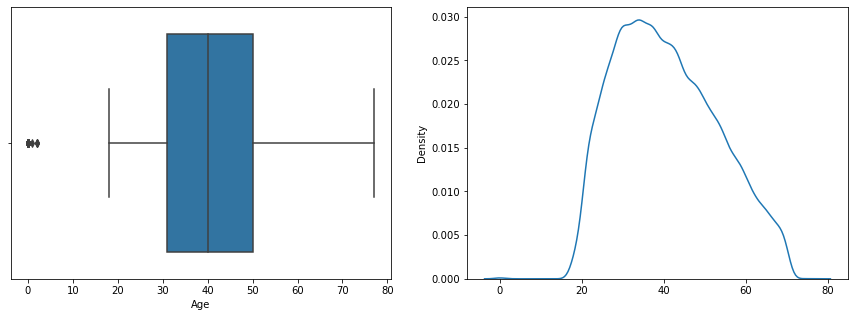

In [13]:
# plotting for Age
outlierplot('Age')

In [14]:
#Capping

In [15]:
Q3=x_train["Age"].quantile(0.75)
Q1=x_train["Age"].quantile(0.25)
IQR=Q3-Q1
ul=Q3+1.5*IQR
ll=Q1-1.5*IQR


In [16]:
x_train.loc[x_train['Age']<ll,"Age"]=ll

In [17]:
# definning a function to perform the imputation
def capping(feature):
    Q3=x_train[feature].quantile(0.75)
    Q1=x_train[feature].quantile(0.25)
    IQR=Q3-Q1
    ul=Q3+1.5*IQR
    ll=Q1-1.5*IQR
    if x_train[feature].min() < ll:
         x_train.loc[x_train[feature]<ll,feature]=ll
    elif x_train[feature].max() > ul:
         x_train.loc[x_train[feature]>ul,feature]=ul
     
    # returns box plot after imutation
    x_train[feature].plot.box()
        

In [18]:
# made a function for plot box and distribution plot
def outlierplot(feature):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(x=x_train[feature],ax=ax1)
    sns.distplot(x=x_train[feature] ,ax=ax2,hist=False)
    plt.show()
    

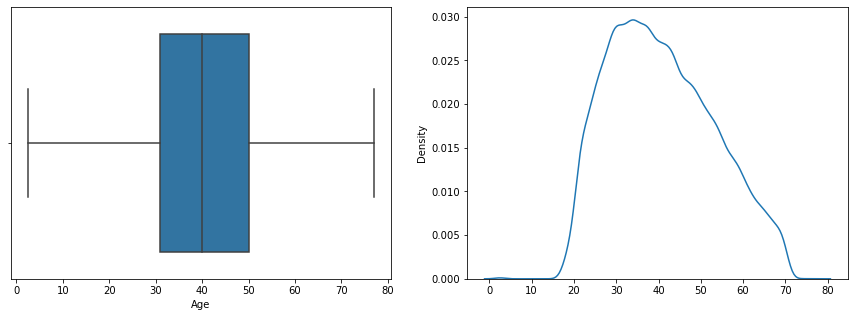

In [19]:
outlierplot("Age")

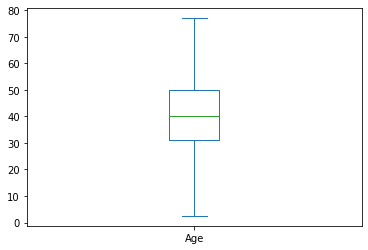

In [20]:
capping('Age')

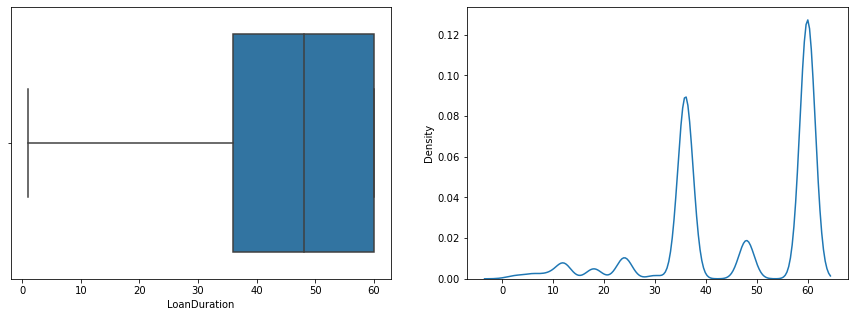

In [21]:
outlierplot("LoanDuration")

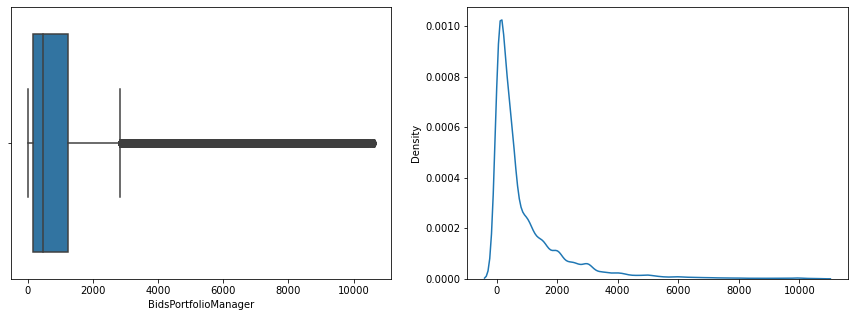

In [22]:
outlierplot("BidsPortfolioManager")

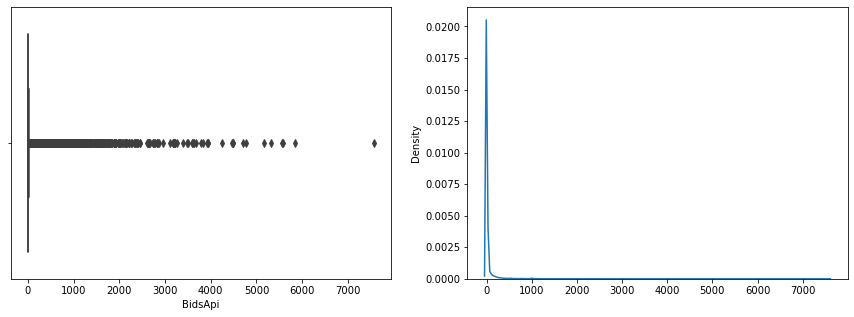

In [23]:
outlierplot("BidsApi")

In [24]:
df=pd.read_csv("C:\\Users\\ADMIN\Desktop\\Bondora_preprocessed.csv",usecols=["BidsPortfolioManager","BidsApi","Age","LoanDuration","ExistingLiabilities","RefinanceLiabilities","Target","MonthlyPaymentDay","NoOfPreviousLoansBeforeLoan","PreviousEarlyRepaymentsCountBeforeLoan"])

In [25]:
df.head()

,BidsPortfolioManager,BidsApi,Age,LoanDuration,ExistingLiabilities,RefinanceLiabilities,MonthlyPaymentDay,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
0,0,0,61,12,0,0,25,1,0,1
1,0,0,48,1,0,0,15,2,0,1
2,0,0,58,20,0,0,25,0,0,1
3,0,0,23,15,0,0,15,1,0,1
4,0,0,25,12,0,0,25,1,0,1


# Handle Categorical Feature with one hot encoding method


In [26]:
#df["Target"].unique()

In [27]:
df["BidsPortfolioManager"].unique()



array([   0, 3110, 1200, ..., 4274, 2974, 5530], dtype=int64)

In [28]:
#tmp = pd.get_dummies(x_train['Age'])

#tmp.head()

In [29]:
df.BidsPortfolioManager.value_counts().sort_values(ascending=False).head(10)

0       4535
525      928
500      890
1000     702
3000     635
2000     635
529      606
530      599
35       565
55       546
Name: BidsPortfolioManager, dtype: int64

In [30]:
bid_cat=df.Age.value_counts().sort_values(ascending=False).head(10).index
bid_cat=list(bid_cat)


In [31]:
bid_cat

[34, 29, 37, 31, 35, 30, 33, 38, 32, 36]

In [32]:

import numpy as np
for categories in bid_cat:
    df[categories]=np.where(df['BidsPortfolioManager']==categories,1,0)


In [33]:
#bid_cat.append('BidsPortfolioManager')
#df[bid_cat]

In [34]:
df["Target"].unique()


array([1, 0], dtype=int64)

In [35]:
df["MonthlyPaymentDay"].unique()

array([25, 15,  9,  3,  1, 10, 28, 24, 20, 23, 11, 18, 12,  5, 26, 22, 16,
        2,  7, 13,  6, 21, 14, 19,  8, 27, 17,  4,  0], dtype=int64)

In [36]:
df["MonthlyPaymentDay"].unique()


array([25, 15,  9,  3,  1, 10, 28, 24, 20, 23, 11, 18, 12,  5, 26, 22, 16,
        2,  7, 13,  6, 21, 14, 19,  8, 27, 17,  4,  0], dtype=int64)

In [37]:
for i in df.columns:
    print(len(df[i].unique()))


5730
1002
62
31
39
21
29
26
11
2
2
2
2
2
2
2
2
2
2
2


In [38]:
df.MonthlyPaymentDay.value_counts().sort_values(ascending=False).head(10)


10    13754
15    12137
1     11759
13    10991
3      9371
8      8639
18     8014
4      6709
5      6094
11     5041
Name: MonthlyPaymentDay, dtype: int64

In [39]:
#month_cat=df.MonthlyPaymentDay.value_counts().sort_values(ascending=False).head(10).index


In [40]:
#month_cat=list(month_cat)


In [41]:
#import numpy as np
#for categories in month_cat:
    #df[categories]=np.where(df['MonthlyPaymentDay']==categories,1,0)


In [42]:
#month_cat.append('MonthlyPaymentDay')


In [43]:
#df[month_cat]

In [44]:
df["NoOfPreviousLoansBeforeLoan"].unique()

array([ 1,  2,  0,  3,  4,  5,  9,  8,  7,  6, 11, 10, 13, 20, 12, 14, 15,
       16, 17, 18, 19, 21, 22, 23, 24, 25], dtype=int64)

In [45]:

for i in df.columns:
    print(len(df[i].unique()))


5730
1002
62
31
39
21
29
26
11
2
2
2
2
2
2
2
2
2
2
2


In [46]:
df.NoOfPreviousLoansBeforeLoan.value_counts().sort_values(ascending=False).head(10)


0    66653
1    26449
2    14257
3     8383
4     5542
5     3836
6     2698
7     1958
8     1424
9     1018
Name: NoOfPreviousLoansBeforeLoan, dtype: int64

In [47]:
nloan_cat=df.NoOfPreviousLoansBeforeLoan.value_counts().sort_values(ascending=False).head(10).index


In [48]:
nloan_cat=list(nloan_cat)


In [49]:
import numpy as np
for categories in nloan_cat:
    df[categories]=np.where(df['NoOfPreviousLoansBeforeLoan']==categories,1,0)


In [50]:
nloan_cat.append('NoOfPreviousLoansBeforeLoan')

In [51]:
df[nloan_cat]

,0,1,2,3,4,5,6,7,8,9,NoOfPreviousLoansBeforeLoan
0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,2
2,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
134524,1,0,0,0,0,0,0,0,0,0,0
134525,0,1,0,0,0,0,0,0,0,0,1
134526,1,0,0,0,0,0,0,0,0,0,0
134527,0,1,0,0,0,0,0,0,0,0,1


In [52]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)
print(x_train.shape ,y_train.shape)
print(x_test.shape , y_test.shape)


(107623, 40) (107623,)
(26906, 40) (26906,)


In [53]:
df.iloc[:,1:].describe()

,BidsApi,Age,LoanDuration,ExistingLiabilities,RefinanceLiabilities,MonthlyPaymentDay,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target,34,...,0,1,2,3,4,5,6,7,8,9
count,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,...,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000
mean,29.111664,40.819295,46.151573,3.181797,0.187313,11.143188,1.487620,0.069903,0.576195,0.001018,...,0.495455,0.196604,0.105977,0.062314,0.041196,0.028514,0.020055,0.014554,0.010585,0.007567
std,150.159148,12.348693,15.202688,3.424242,0.896455,7.044104,2.396148,0.359461,0.494162,0.031896,...,0.499981,0.397432,0.307810,0.241725,0.198743,0.166437,0.140189,0.119761,0.102338,0.086660
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,36.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,40.000000,48.000000,2.000000,0.000000,10.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,50.000000,60.000000,5.000000,0.000000,15.000000,2.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7570.000000,77.000000,60.000000,40.000000,23.000000,28.000000,25.000000,11.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


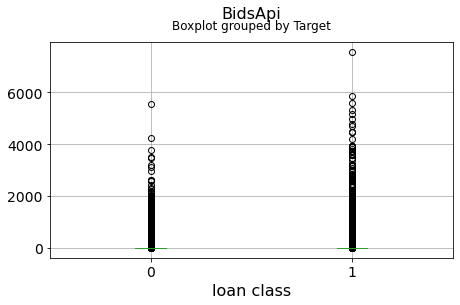

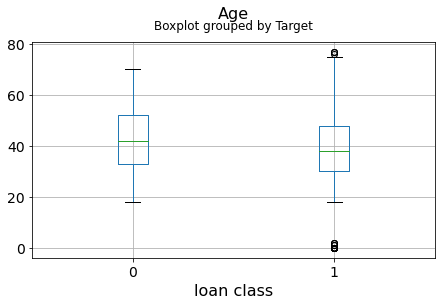

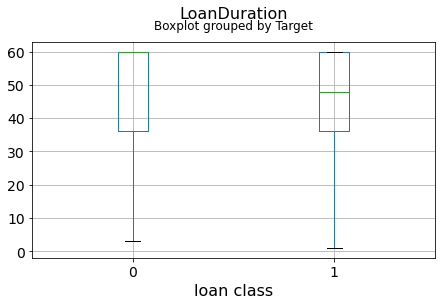

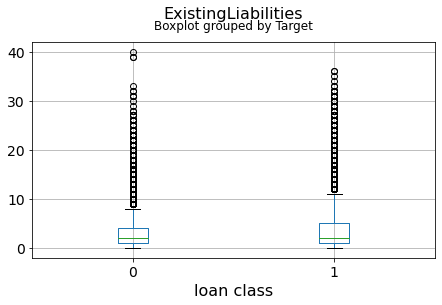

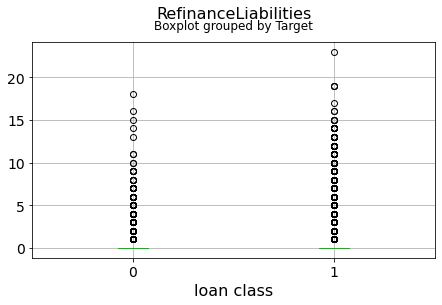

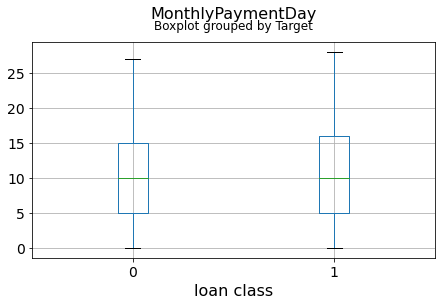

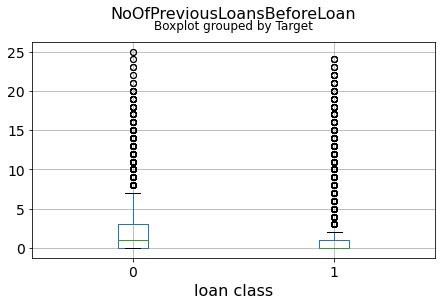

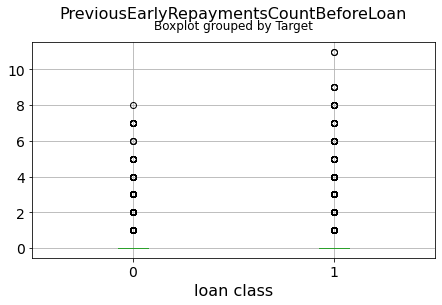

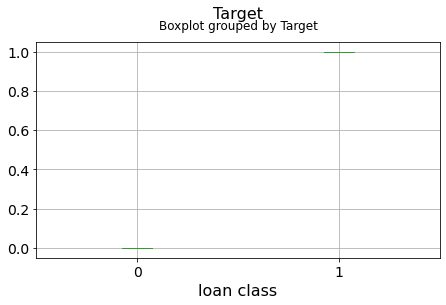

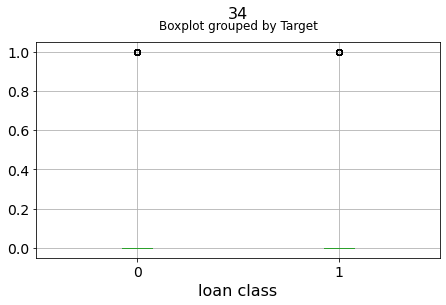

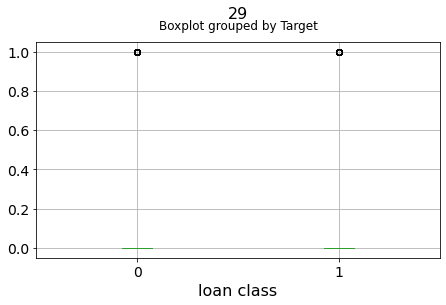

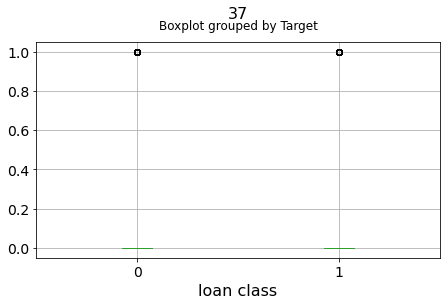

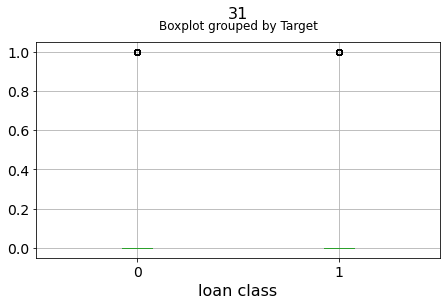

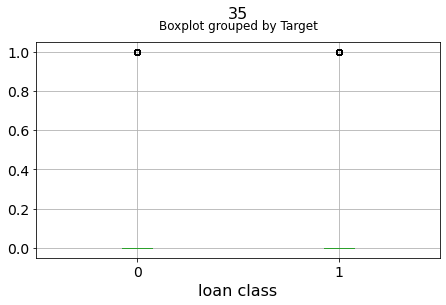

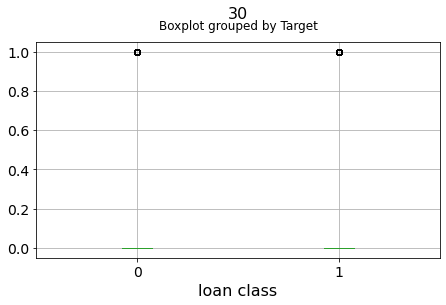

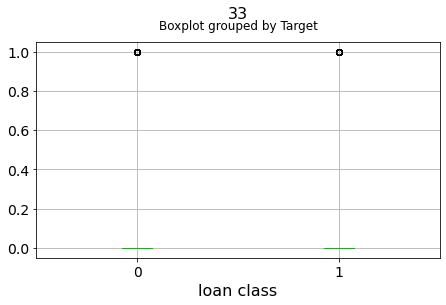

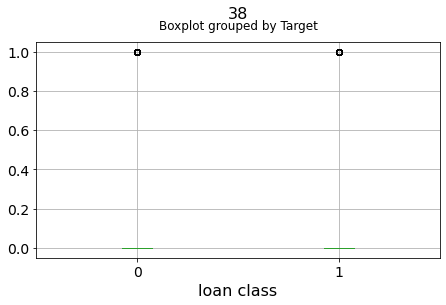

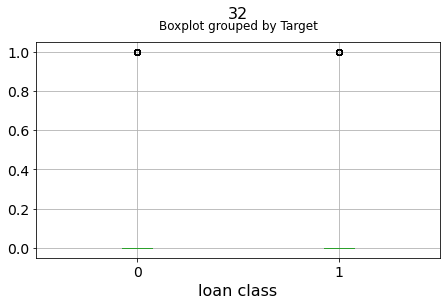

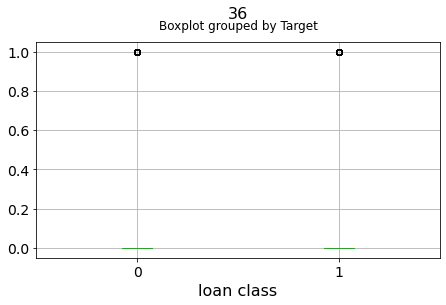

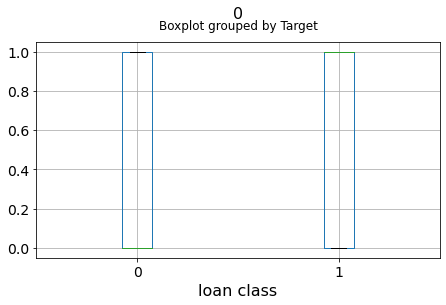

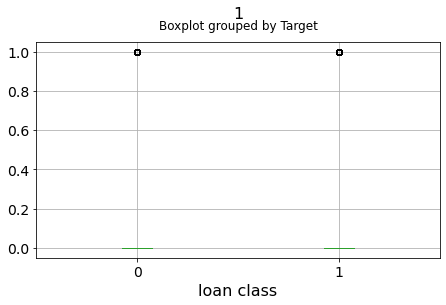

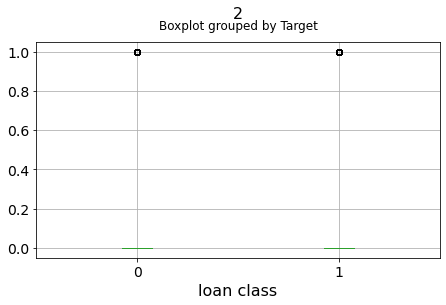

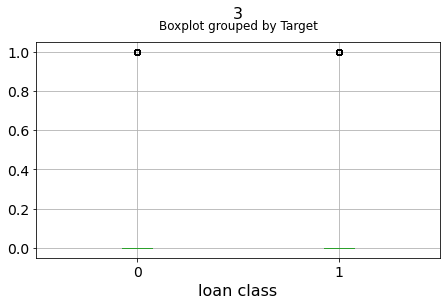

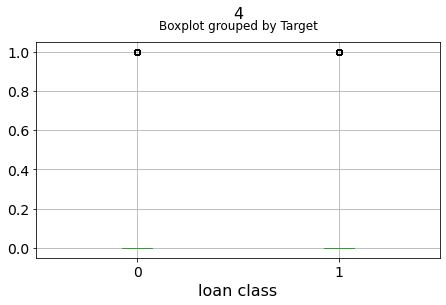

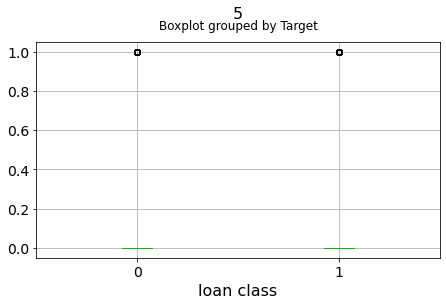

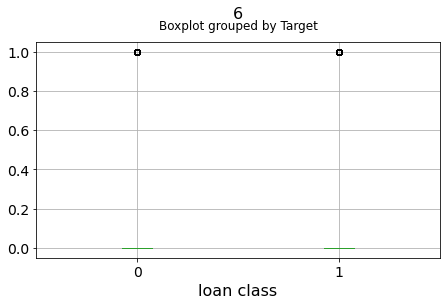

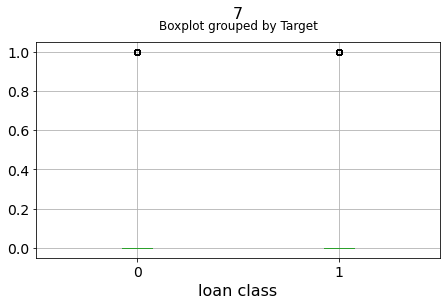

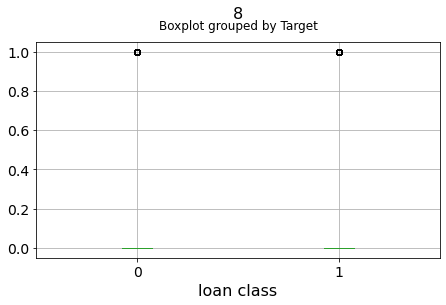

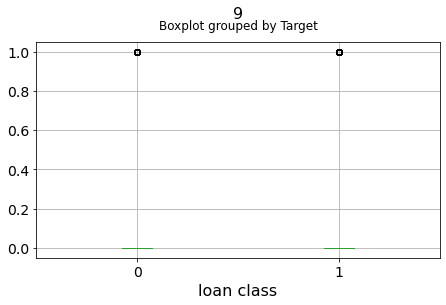

In [54]:
for c in df.columns[1:]:
    df.boxplot(c,by='Target',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("loan class", fontsize=16)

# Principal Component Analysis
#Data scaling

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
x=df.drop(columns=['Target'])
y=df['Target']

In [57]:
df["Target"].unique()

array([1, 0], dtype=int64)

In [58]:
x = scaler.fit_transform(x)

In [59]:

dfx = pd.DataFrame(data=x,columns=df.columns[1:])

In [60]:
dfx.head(10)

,BidsApi,Age,LoanDuration,ExistingLiabilities,RefinanceLiabilities,MonthlyPaymentDay,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target,34,...,0,1,2,3,4,5,6,7,8,9
0,-0.712891,-0.193873,1.634244,-2.246425,-0.929201,-0.208949,1.967158,-0.203502,-0.194467,-0.031928,...,-0.990950,2.021473,-0.344296,-0.257788,-0.207281,-0.171322,-0.143058,-0.12153,-0.103433,-0.08732
1,-0.712891,-0.193873,0.581497,-2.969984,-0.929201,-0.208949,0.547525,0.213836,-0.194467,-0.031928,...,-0.990950,-0.494689,2.904479,-0.257788,-0.207281,-0.171322,-0.143058,-0.12153,-0.103433,-0.08732
2,-0.712891,-0.193873,1.391303,-1.720200,-0.929201,-0.208949,1.967158,-0.620840,-0.194467,-0.031928,...,1.009133,-0.494689,-0.344296,-0.257788,-0.207281,-0.171322,-0.143058,-0.12153,-0.103433,-0.08732
3,-0.712891,-0.193873,-1.443016,-2.049091,-0.929201,-0.208949,0.547525,-0.203502,-0.194467,-0.031928,...,-0.990950,2.021473,-0.344296,-0.257788,-0.207281,-0.171322,-0.143058,-0.12153,-0.103433,-0.08732
4,-0.712891,-0.193873,-1.281055,-2.246425,-0.929201,-0.208949,1.967158,-0.203502,-0.194467,-0.031928,...,-0.990950,2.021473,-0.344296,-0.257788,-0.207281,-0.171322,-0.143058,-0.12153,-0.103433,-0.08732
5,-0.712891,-0.193873,-1.523997,-1.457088,-0.929201,-0.208949,-0.304254,0.631174,-0.194467,-0.031928,...,-0.990950,-0.494689,-0.344296,3.879154,-0.207281,-0.171322,-0.143058,-0.12153,-0.103433,-0.08732
6,-0.712891,-0.193873,0.500517,-1.720200,-0.929201,-0.208949,-1.156033,-0.203502,-0.194467,-0.031928,...,-0.990950,2.021473,-0.344296,-0.257788,-0.207281,-0.171322,-0.143058,-0.12153,-0.103433,-0.08732
7,-0.712891,-0.193873,-1.443016,-2.641094,-0.929201,-0.208949,-1.439960,0.631174,-0.194467,-0.031928,...,-0.990950,-0.494689,-0.344296,3.879154,-0.207281,-0.171322,-0.143058,-0.12153,-0.103433,-0.08732
8,-0.712891,-0.193873,-1.443016,-2.246425,-0.929201,-0.208949,-1.439960,1.048512,-0.194467,-0.031928,...,-0.990950,-0.494689,-0.344296,-0.257788,4.824360,-0.171322,-0.143058,-0.12153,-0.103433,-0.08732
9,-0.712891,-0.193873,-0.228308,-2.246425,-0.929201,-0.208949,-0.162291,-0.620840,-0.194467,-0.031928,...,1.009133,-0.494689,-0.344296,-0.257788,-0.207281,-0.171322,-0.143058,-0.12153,-0.103433,-0.08732


# PCA class import and analysis

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx)

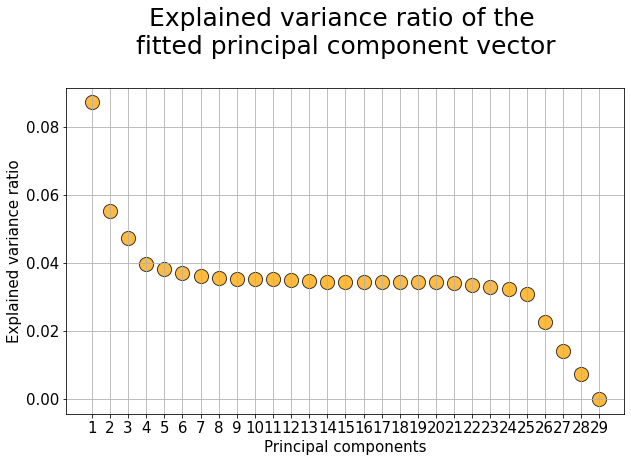

In [62]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()


# Transform the scaled data set using the fitted PCA object

In [63]:
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.455009,-1.394678,1.923681,-0.605076,1.022127,-0.586566,-0.112396,0.050505,-0.141874,-0.472498,...,-0.105833,-0.106064,-1.172532,-0.196398,-0.193440,2.893187,0.136162,-0.607632,0.153116,-0.000744
1,0.780035,-1.414169,0.264195,2.906263,0.403252,-1.518127,-0.686472,0.463791,-0.001142,-0.820989,...,-0.070652,-0.144747,-1.114575,0.556496,0.494911,1.550177,-0.425530,-0.835494,0.139245,-0.002267
2,-0.934585,-0.563404,-0.741889,0.198543,0.833754,-0.254189,0.076001,-0.071520,-0.141418,-0.291918,...,-0.131824,-0.103714,-0.985186,-0.365528,-0.302732,2.808856,0.290318,-0.326634,0.123426,0.000041
3,0.089104,-1.313397,1.797727,-0.448514,2.216518,-1.135147,-0.444039,0.115417,0.124875,0.092323,...,-0.103579,0.092828,-1.135580,0.515250,0.033999,0.101212,-0.222051,-0.440310,0.134669,-0.001088
4,0.322048,-1.146312,1.868896,-0.236786,2.639024,-1.132518,-0.286249,-0.064507,0.095204,0.271349,...,-0.155128,0.061146,-1.490652,0.142504,-0.671906,1.003468,-0.046030,-0.483259,0.148115,-0.000726
5,0.869633,-1.232250,-0.278972,0.845806,2.627395,2.696991,-0.887206,0.757998,0.203131,-0.479534,...,0.295172,-0.112371,-0.667915,0.695491,0.241258,-1.033322,-0.372448,-0.981312,0.105427,-0.003130
6,-0.102599,-1.688737,1.757871,-0.980221,0.476859,-0.711081,-0.491721,0.404229,-0.013110,-0.647928,...,-0.002182,0.010577,-0.453047,0.691553,1.201623,0.366615,-0.272134,-0.476900,0.121384,-0.001509
7,0.833847,-1.490177,-0.410193,0.759906,2.856407,2.342994,-1.207406,1.076920,0.205884,-0.968913,...,0.290585,-0.133370,-0.698325,1.296524,1.282605,-1.069568,-0.901328,-1.000761,0.106970,-0.003798
8,1.248696,-1.521315,-0.840790,0.102067,2.113997,-1.390448,3.715906,1.207625,0.125152,-1.319599,...,-0.604149,0.074435,0.067254,0.932499,1.394033,-1.377306,-0.965848,-1.264243,0.087625,-0.004700
9,-1.260412,-0.761896,-0.922455,0.122317,1.382521,-0.755724,-0.369328,0.246185,0.012677,-0.388386,...,-0.108040,0.001772,-0.809568,0.554186,0.801058,0.899549,-0.305594,-0.230946,0.108211,-0.000724


In [64]:
x=df.drop(columns=['Target'])
y=df['Target']

In [65]:
x.shape , y.shape

((134529, 29), (134529,))

In [66]:

from sklearn.model_selection import train_test_split
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)
print(x_train.shape ,y_train.shape)
print(x_test.shape , y_test.shape)


(107623, 29) (107623,)
(26906, 29) (26906,)


# ExtraTreesClassifier method

# Feature Selection

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
          
          


[0.32952688 0.12081492 0.18102265 0.05092634 0.10308418 0.01737901
 0.13700787 0.0092763  0.01265994 0.00055185 0.00052339 0.00058469
 0.00065214 0.00119212 0.00107564 0.00047741 0.00064089 0.0005152
 0.00055696 0.01896035 0.00242507 0.00160288 0.00128558 0.00128698
 0.00122095 0.00129664 0.00141639 0.00113597 0.00090081]


<function matplotlib.pyplot.show(close=None, block=None)>

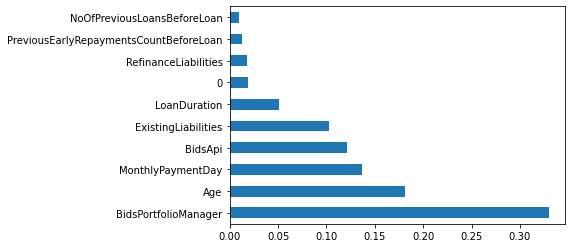

In [68]:
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show